## Challenge Title: Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### i. Data Preparation and Exploration:

In [2]:
df = pd.read_csv("sales_data.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### ii. Data Analysis:

In [15]:
mean = df.groupby('Product line')[['Unit price', 'Quantity']].mean()
mean 

,Unit price,Quantity
Product line,,
Electronic accessories,53.551588,5.711765
Fashion accessories,57.153652,5.067416
Food and beverages,56.008851,5.471264
Health and beauty,54.854474,5.618421
Home and lifestyle,55.316937,5.693750
Sports and travel,56.993253,5.542169


In [16]:
mean['Unit price'].idxmax()

'Fashion accessories'

#### iii. Sales Insights: 

In [6]:
revenueByBranch = df.groupby('Branch')['Total'].sum()
revenueByBranch

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [7]:
topRevenueBranch = revenueByBranch.idxmax()
topRevenueBranch

'C'

#### iv. Customer Insights:

In [8]:
countCustomerType = df['Customer type'].value_counts()
countCustomerType

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [9]:
genderMeanRating = df.groupby('Gender')['Rating'].mean()

genderHighRating = genderMeanRating.idxmax()
genderHighRating

'Male'

#### v. Visualisation: 

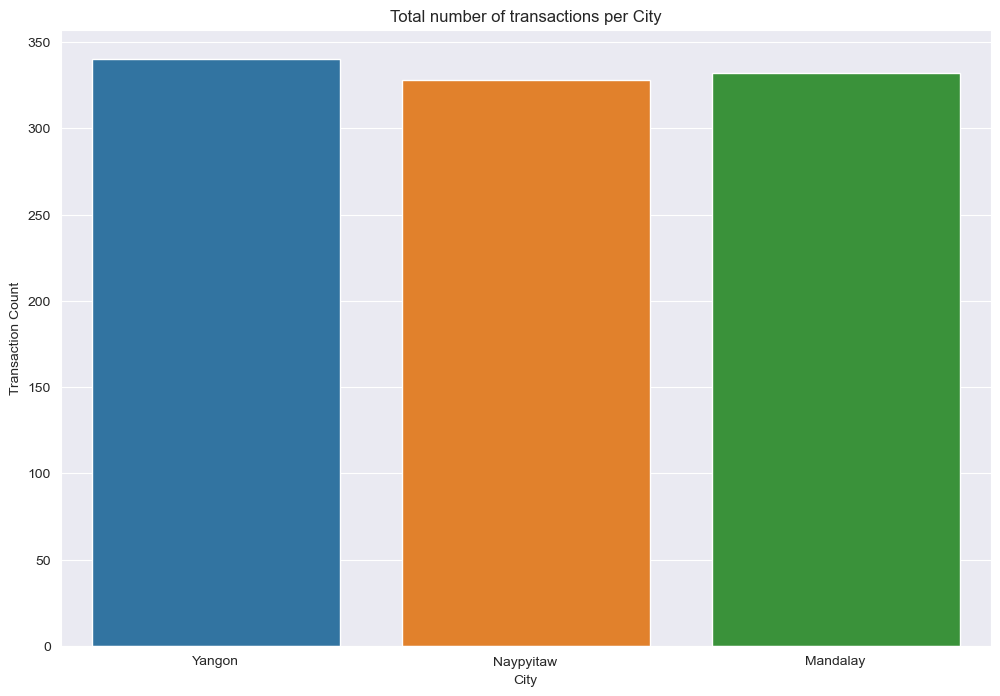

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(x='City', data=df)
plt.title('Total number of transactions per City')
plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.show()

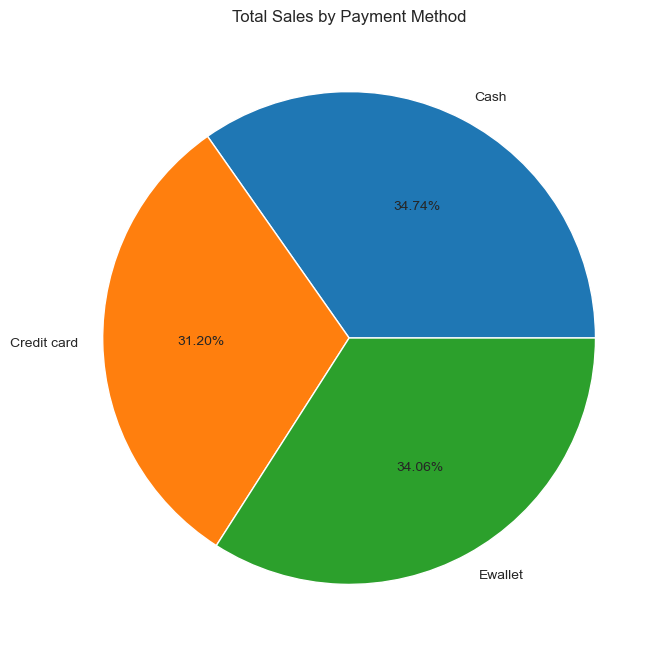

In [11]:
plt.figure(figsize=(12, 8))
totalSalesPaymentMethod = df.groupby('Payment')['Total'].sum()
plt.pie(totalSalesPaymentMethod, labels=totalSalesPaymentMethod.index, autopct='%1.2f%%')
plt.title('Total Sales by Payment Method')
plt.show()

#### Date-Time Analysis:

In [12]:
df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [14]:
df['Month'] = df['Date'].dt.month
salesTop1Month = df['Month'].value_counts().idxmax()
salesTop1Month

1

---

THE END